In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.colors import Normalize
from matplotlib.ticker import MaxNLocator

import punct_utils as utils

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

# Set parameters

In [2]:
n = 1000 # sample size
c = 0.3 # p/n
alpha = 0.1 # L/n
beta = alpha/c

p = int(c*n) # dimension
L = int(alpha*n) # band size
setting = "$n = {} \quad p = {} \quad L = {}$".format(n, p, L)

k = 2 # number of classes
pi = np.array([0.5, 0.5]) # proportion of each class
# centroid of each class
mu = stats.norm.rvs(size=(p, 1))
mu_norm = 2
mu = mu_norm*mu/np.linalg.norm(mu)
M = np.concatenate([+mu, -mu], axis=1)
setting += "$\quad || \mu || = {}$".format(mu_norm)
easy_setting = True

# k = 3 # number of classes
# pi = np.array([0.34, 0.33, 0.33]) # proportion of each class
# # centroid of each class
# cov_mat = np.kron(np.array([[10., 5.5, 2.], [5.5, 15., 4.], [2., 4., 12.]]), np.eye(p))/p
# M = stats.multivariate_normal.rvs(cov=cov_mat).reshape((p, k))
# M = 10*M/np.sqrt(np.diag((M.T)@M)).min()
# easy_setting = False

J = utils.getJ(n, pi)
nbMC = 1 # number of Monte-Carlo simulations

streaming = True
animation = False

# Computations

**Limiting spectral distribution**: we use the fact that, if $m$ is the Stieltjes transform of a measure which has a density $d(x)$ in $x$, then
$$
d(x) = \frac{1}{\pi} \lim_{y \downarrow 0} \Im \left[ m(x + \mathrm{i} y) \right].
$$

In [3]:
# Simulations
eigvals_t, eigvecs_t = utils.simul(nbMC, L, M, J, mask='toeplitz', comp=False)
eigvals_c, eigvecs_c = utils.simul(nbMC, L, M, J, mask='circulant', comp=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.95it/s]


In [4]:
# Get eigenbases
tau, basis_t = utils.basis(n, L, kind='toeplitz')
psi, basis_c = utils.basis(n, L, kind='circulant')

In [5]:
# Limiting spectral distribution
axr = np.linspace(eigvals_c.min(), eigvals_c.max(), 1000)
eta0_t = utils.eta0(axr, n, p, L, tau)
eta0_c = utils.eta0(axr, n, p, L, psi)
LSD_t = (1/(1-axr-eta0_t)).imag/np.pi
LSD_c = (1/(1-axr-eta0_c)).imag/np.pi

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.32it/s]


In [6]:
# Get spikes and alignments
if easy_setting:
    spikes_c, spikes_t = utils.get_spikes(n, p, L, mu_norm)
    spikes_idx_c, spikes_c, zeta_c, natural_idx_c = spikes_c
    spikes_idx_t, spikes_t, zeta_t, natural_idx_t = spikes_t

# Visualisation

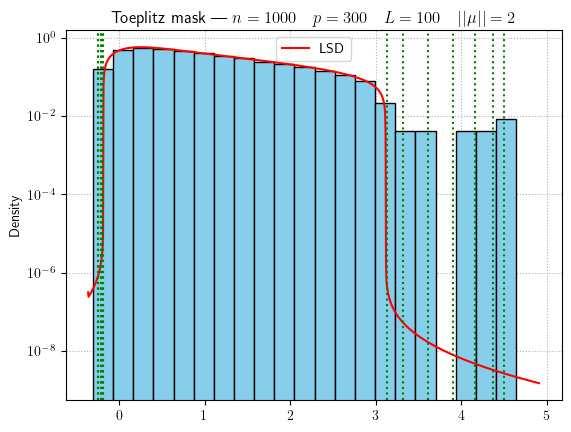

In [7]:
plt.hist(eigvals_t.flatten(), bins='auto', color='skyblue', edgecolor='black', density=True, zorder=2)
plt.plot(axr, LSD_t, color='red', label="LSD")
if easy_setting:
    for spike in spikes_t:
        plt.axvline(x=spike, ls=':', color='green')
plt.grid(ls=':')
plt.yscale('log')
plt.ylabel("Density")
plt.legend()
plt.title("Toeplitz mask | "+setting)
plt.show()

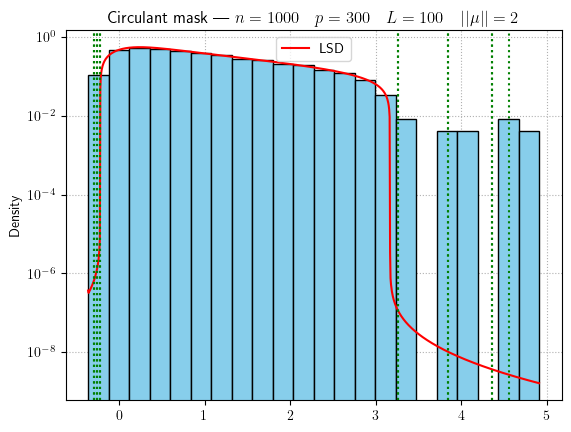

In [8]:
plt.hist(eigvals_c.flatten(), bins='auto', color='skyblue', edgecolor='black', density=True, zorder=2)
plt.plot(axr, LSD_c, color='red', label="LSD")
if easy_setting:
    for spike in spikes_c:
        plt.axvline(x=spike, ls=':', color='green')
plt.grid(ls=':')
plt.yscale('log')
plt.ylabel("Density")
plt.legend()
plt.title("Circulant mask | "+setting)
plt.show()

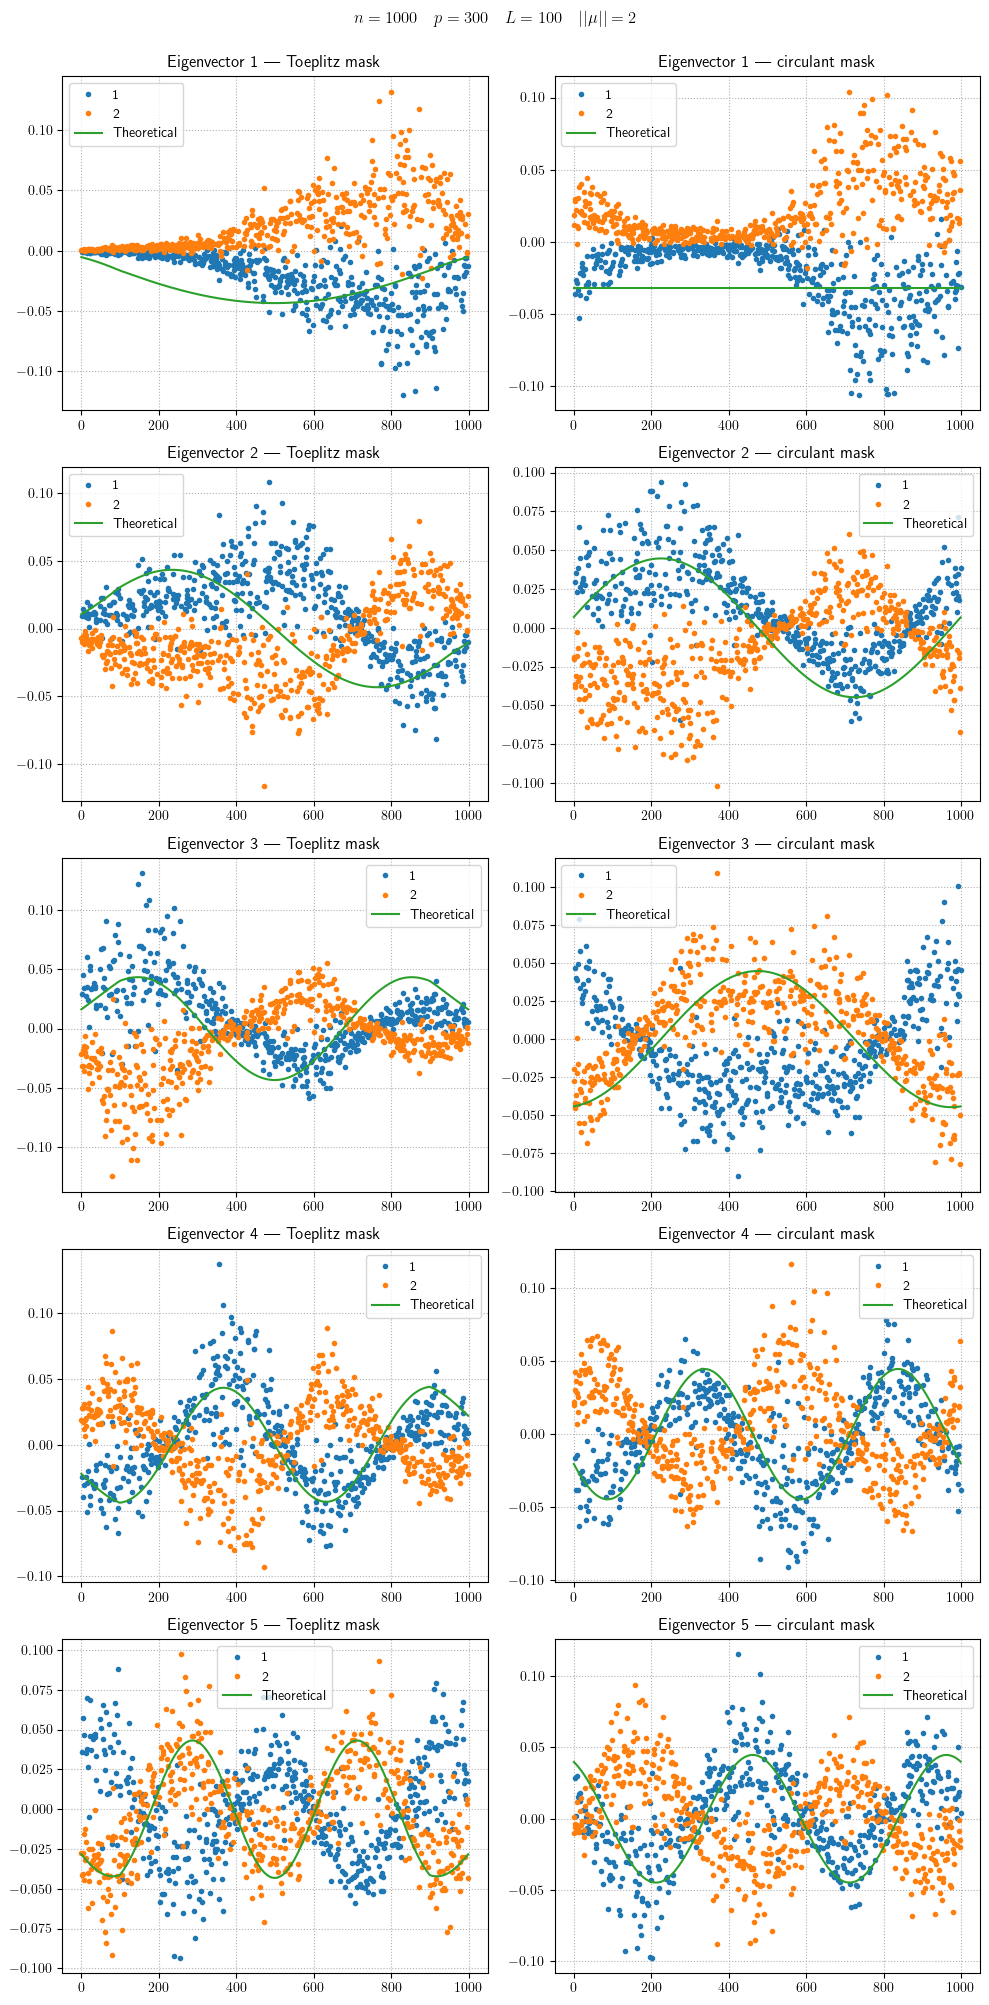

In [9]:
x = np.arange(n)
n_to_plot = 5
to_plot = spikes_idx_t[:n_to_plot] if easy_setting else np.arange(n-1, n-1-n_to_plot, -1)

fig, ax = plt.subplots(n_to_plot, 2, figsize=(10, 4*n_to_plot), squeeze=False)
for ii, i in enumerate(to_plot):
    for j in range(k):
        cl = (J[:, j] == 1)
        ax[ii, 0].plot(x[cl], eigvecs_t[0, i, cl], ls='', marker='.', label=j+1)
        ax[ii, 1].plot(x[cl], eigvecs_c[0, i, cl], ls='', marker='.', label=j+1)
    ax[ii, 0].plot(x, basis_t[i], label="Theoretical")
    ax[ii, 1].plot(x, basis_c[i], label="Theoretical")
    ax[ii, 0].grid(ls=':')
    ax[ii, 1].grid(ls=':')
    ax[ii, 0].set_title("Eigenvector {} | Toeplitz mask".format(n-i))
    ax[ii, 1].set_title("Eigenvector {} | circulant mask".format(n-i))
    ax[ii, 0].legend()
    ax[ii, 1].legend()
fig.suptitle(setting, y=1)
fig.tight_layout()
plt.show()

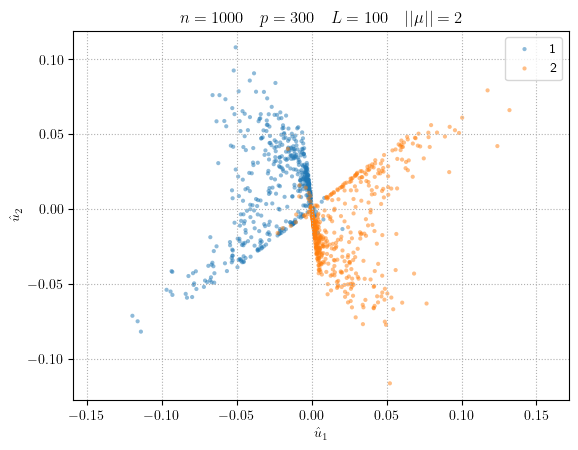

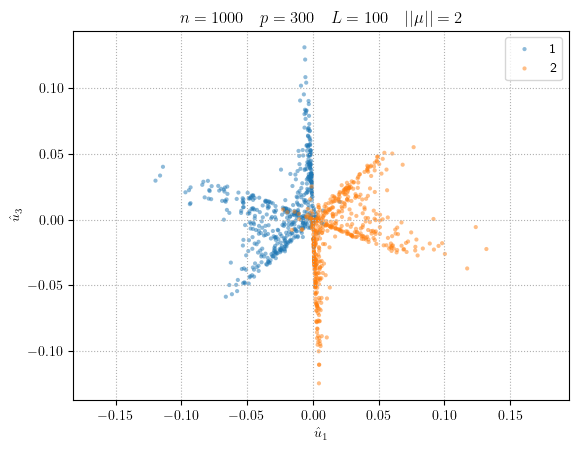

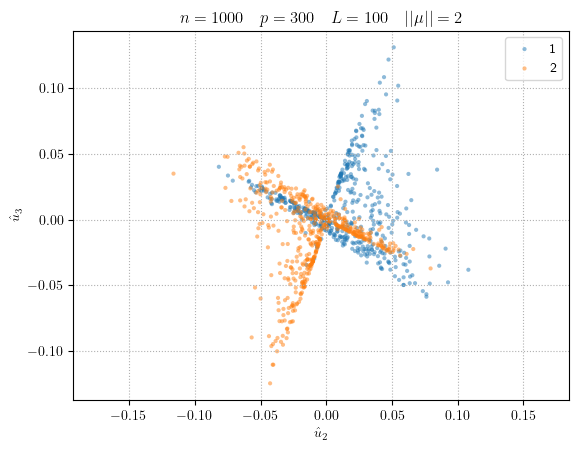

In [10]:
to_plot = np.array([[0, 1], [0, 2], [1, 2]])
to_plot = spikes_idx_t[to_plot] if easy_setting else n-1-to_plot

for i, [a, b] in enumerate(to_plot):
    for j in range(k):
        cl = (J[:, j] == 1)
        x, y = eigvecs_t[0, a, cl], eigvecs_t[0, b, cl]
        plt.scatter(x, y, marker='.', edgecolors='none', alpha=.5, label=j+1)
    plt.grid(ls=':')
    plt.axis('equal')
    plt.xlabel("$\\hat{{u}}_{{{}}}$".format(n-a))
    plt.ylabel("$\\hat{{u}}_{{{}}}$".format(n-b))
    plt.legend()
    plt.title(setting)
    plt.show()

# Classification

In [11]:
import scipy.linalg as linalg
from itertools import permutations

In [12]:
if easy_setting:
    print("Optimal classification error: {:.2%}".format(stats.norm.sf(np.sqrt(zeta_t[0]/(1-zeta_t[0])))))

Optimal classification error: 4.84%


In [13]:
idx_eigvecs = [-1, -2, -3, -4, -5] # eigenvectors used for the classification
idx_basis = [-1, -2, -3, -4, -5] # Toeplitz basis
Lip = np.max(linalg.norm(np.diff(basis_t[idx_basis], axis=1), axis=0))

In [14]:
%%time
partition, details = utils.classification(n, k, eigvecs_t[0], idx_eigvecs, basis_t, idx_basis)

Wall time: 98.5 ms


In [15]:
curves, reg, exp_smooth, partition0, n_tries = details
print("N tries: {}".format(n_tries))

N tries: 2


In [16]:
permut = np.array(list(permutations(range(k))))
c_err = np.min([np.mean(p[partition] != np.argmax(J, axis=1)) for p in permut])
print("Classification error: {:.2%}".format(c_err))

Classification error: 5.30%


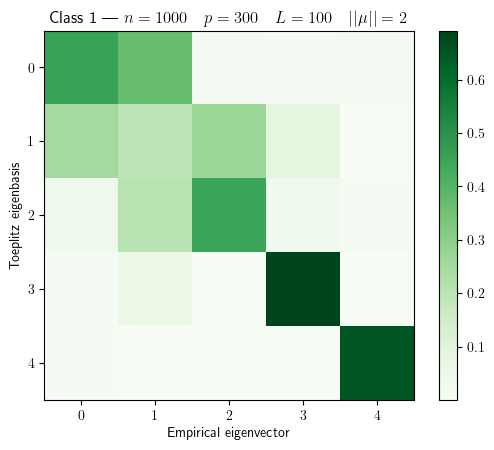

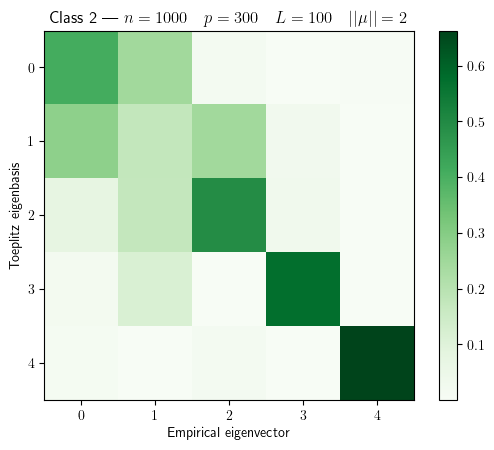

In [17]:
for j in range(k):
    plt.colorbar(plt.imshow(reg[j]**2, interpolation='none', cmap='Greens'))
    plt.xlabel("Empirical eigenvector")
    plt.ylabel("Toeplitz eigenbasis")
    plt.title("Class {} | ".format(j+1)+setting)
    plt.show()

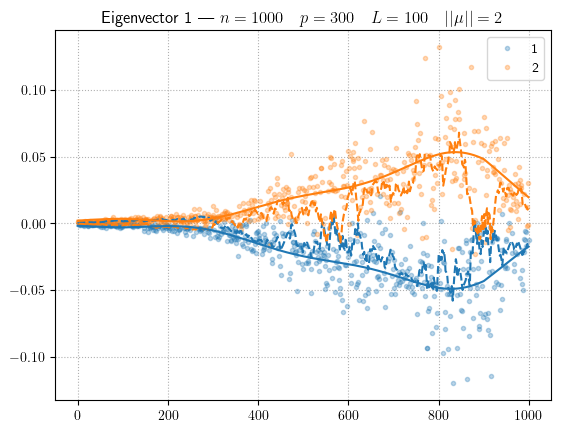

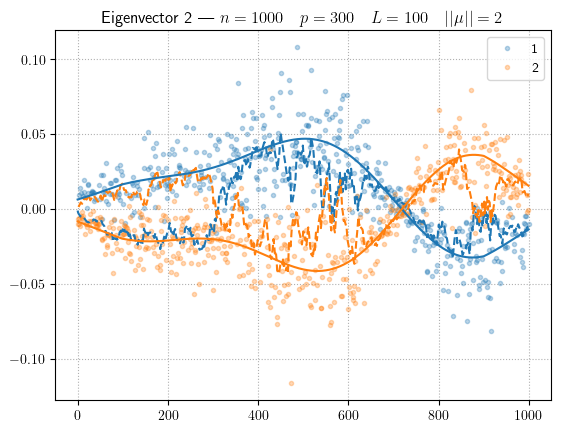

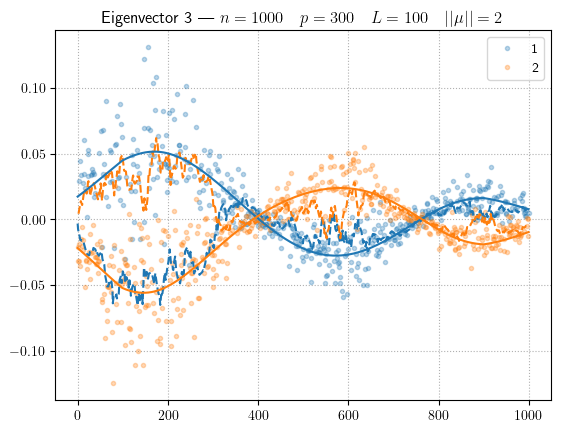

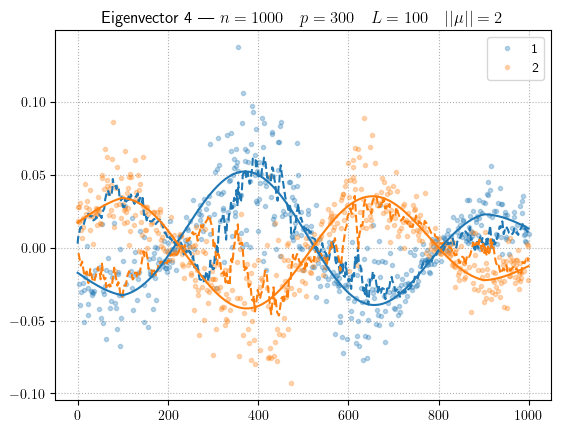

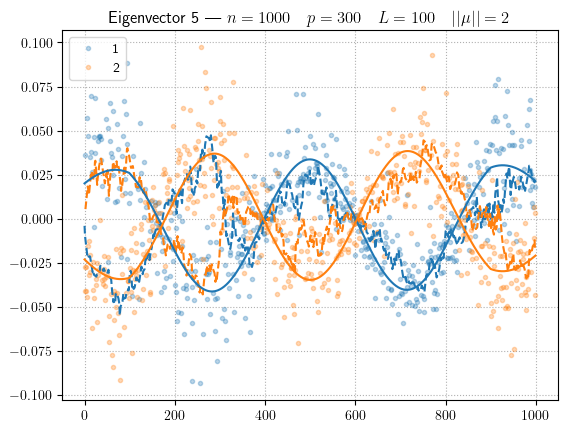

In [18]:
plot_true = True

x = np.arange(n)
for ll, l in enumerate(idx_eigvecs):
    for j in range(k):
        cl = (J[:, j] == 1) if plot_true else (partition == j)
        plt.plot(x[cl], eigvecs_t[0, l, cl], ls='', marker='.', label=j+1, alpha=.3, c='C'+str(j), zorder=2)
        plt.plot(x[partition0 == j], exp_smooth[ll, partition0 == j], ls='--', c='C'+str(j), zorder=3)
        plt.plot(x, curves[j, ll], ls='-', c='C'+str(j), zorder=4)
    plt.grid(ls=':')
    plt.legend()
    plt.title("Eigenvector {} | ".format((n-l)%n)+setting)
    plt.show()

# Streaming

In [19]:
from scipy.sparse import dia_matrix
from scipy.sparse.linalg import eigsh
from tqdm import tqdm

In [20]:
if streaming:
    T = 3*n
    n_eigvecs = 5
    
    streaming_setting = "$T = {} \\quad$".format(T)+setting
    
    # Create artificial data
    JT = utils.getJ(T, pi)
    P = M@(JT.T) # signal
    Z = stats.norm.rvs(size=(p, T)) # noise
    X = Z+P # observation
    
    # Initialisation
    K_data = np.zeros((T, L)) # sparse kernel matrix, (n, L) in practice
    lbda = np.zeros((T, n_eigvecs)) # top eigenvalues
    w = np.ones((T, n, n_eigvecs)) # top eigenvectors
    
    def make_K(K_data):
        data_u = K_data.T
        offsets_u = np.arange(L)
        K_u = dia_matrix((data_u, offsets_u), shape=(n, n))
        data_l = K_data[:, 1:].T
        offsets_l = np.arange(1, L)
        K_l = dia_matrix((data_l, offsets_l), shape=(n, n)).T
        return K_u+K_l
    
    # Streaming
    for t in tqdm(range(T)):
        tL = max(0, t-L+1) # data is kept from tL to t
        K_data[t, :t-tL+1] = (X[:, t]@X[:, tL:t+1]/p)[::-1]
        t_obs = max(0, t-n+1) # data is clustered from t_obs to t
        K = make_K(K_data[t_obs:t_obs+n]) # make the (n, n) sparse kernel matrix
        # Compute top eigenpairs
        if t >= n_eigvecs:
            lbda[t], w[t] = eigsh(K, k=n_eigvecs, v0=w[t-1, :, 0], which='LA')
        else:
            lbda[t, -t-1:], w[t, :, -t-1:] = eigsh(K, k=t+1, v0=w[t-1, :, 0], which='LA')
        # Sign correction
        if t >= n:
            w[t] *= np.sign(np.sum(w[t, :-1]*w[t-1, 1:], axis=0))
        elif t > 0:
            w[t] *= np.sign(np.sum(w[t]*w[t-1], axis=0))
    w = np.transpose(w[:, :, ::-1], (0, 2, 1))
    lbda = lbda[:, ::-1]

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [02:10<00:00, 23.05it/s]


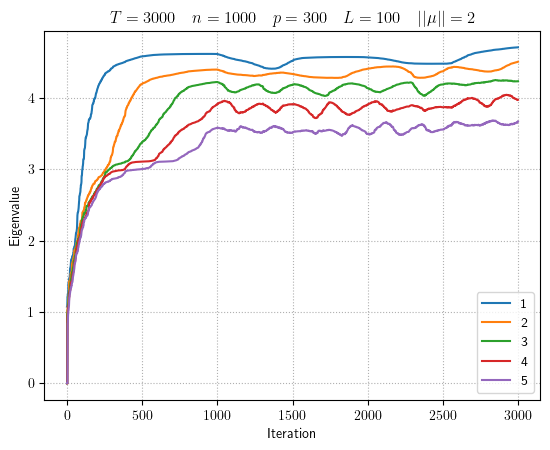

In [21]:
if streaming:
    plt.plot(lbda)
    plt.grid(ls=':')
    plt.xlabel("Iteration")
    plt.ylabel("Eigenvalue")
    plt.title(streaming_setting)
    plt.legend(np.arange(1, n_eigvecs+1))
    plt.show()

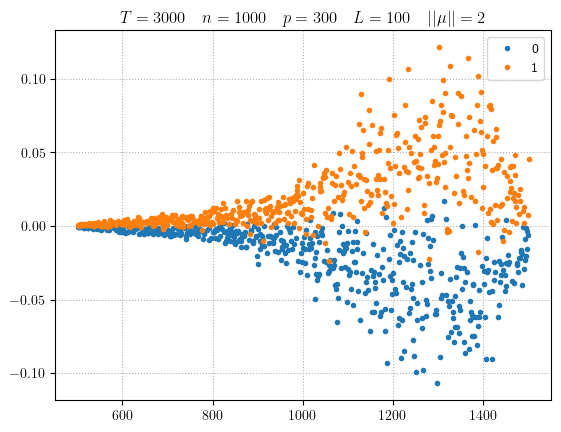

In [22]:
if streaming:
    t = T//2
    i = 0

    x = np.arange(max(0, t-n+1), max(n, t+1))
    for j in range(k):
        cl = (JT[max(0, t-n+1):t+1, j] == 1)
        cl = np.append(cl, np.zeros(max(0, n-t-1), dtype=bool))
        plt.plot(x[cl], w[t, i, cl], ls='', marker='.', label=j)
    plt.grid(ls=':')
    plt.title(streaming_setting)
    plt.legend()
    plt.show()

In [23]:
if streaming and easy_setting:
    s_, t_ = np.meshgrid(np.arange(n), np.arange(T))
    mask = (t_+s_ >= T)
    s_[mask] = 0
    classif = np.sign(w[t_+s_, 0, np.minimum(t_, n-1-s_)])
    classif[mask] = 0

In [24]:
if streaming and easy_setting:
    err_streaming = (np.repeat(JT[:, 0]-JT[:, 1], n).reshape((T, n)) != classif)
    mean_err_streaming = np.mean(err_streaming[n:-n], axis=0)
    mean_err_streaming = np.minimum(mean_err_streaming, 1-mean_err_streaming)

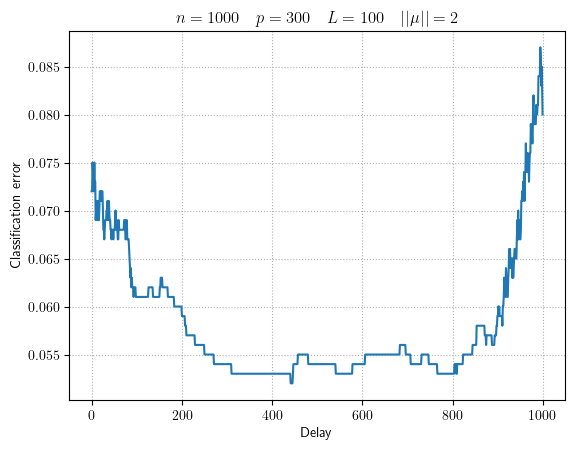

In [25]:
if streaming and easy_setting:
    plt.plot(mean_err_streaming, ls='-', marker='')
    plt.grid(ls=':')
    plt.xlabel("Delay")
    plt.ylabel("Classification error")
    plt.title(setting)
    plt.show()

In [26]:
if streaming and animation:
    from matplotlib.animation import FuncAnimation
    %matplotlib notebook
    
    i = 0

    fig, ax = plt.subplots()

    x = np.arange(0, n)
    ax.set_xlim(0, n)
    ax.set_ylim(w[0:, i].min(), w[0:, i].max())
    for j in range(k):
        cl = (JT[0:1, j] == 1)
        cl = np.append(cl, np.zeros(n-1, dtype=bool))
        ax.plot(x[cl], w[0, i, cl], ls='', marker='.', label=j)
    ax.grid(ls=':')
    ax.set_title(streaming_setting)
    ax.legend()

    def animate(t):
        x = np.arange(max(0, t-n+1), max(n, t+1))
        ax.set_xlim(x[0], x[-1])
        ax.set_ylim((w[t, i].min(), w[t, i].max()))
        for j in range(k):
            cl = (JT[max(0, t-n+1):t+1, j] == 1)
            cl = np.append(cl, np.zeros(max(0, n-t-1), dtype=bool))
            ax.lines[j].set_data((x[cl], w[t, i, cl]))

    anim = FuncAnimation(fig, animate, frames=T, interval=5, repeat=False)
    plt.show()